# See how often WaybackMachine Collects these homepages

In [35]:
from tqdm.auto import tqdm

In [37]:
import pandas as pd 
from subprocess import Popen, PIPE, check_call

sites_df = pd.read_csv('../bin/news-homepages/newshomepages/sources/sites.csv')

In [ ]:
all_output = []
for url in tqdm(sites_df['url']):
    p = Popen([
            "waybackpack", url,
            "--from-date",
            '20221201',
            "--to-date",
            '20221202',
            "--list"
    ], stdin=PIPE, stdout=PIPE, stderr=PIPE)
    output, err = p.communicate()
    
    all_output.append({'site': url, 'output': output.decode(), 'err': err.decode()})

In [52]:
all_output_df = pd.DataFrame(all_output)

In [57]:
all_output_df['err'].loc[lambda df: df != ''].shape 

(49,)

In [60]:
all_output_df = all_output_df.loc[lambda df: df['err'] == '']

In [70]:
import re
from datetime import datetime

In [ ]:
all_output_df['page_snapshot_times'] = (all_output_df['output']
 .apply(lambda x: re.findall('\d{14}', x))
 .apply(lambda x: list(map(lambda y: datetime.strptime(y, '%Y%m%d%H%M%S'), x)))
)

<AxesSubplot: >

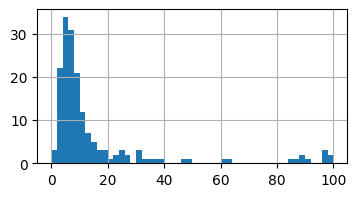

In [97]:
all_output_df['page_snapshot_times'].str.len().hist(bins=50, figsize=(4,2 ), range=(0, 100))

In [112]:
all_output_df['page_snapshot_times'].str.len().value_counts().sort_index().iloc[:10]

0     2
1     1
2     4
3    18
4    18
5    16
6    16
7    15
8    10
9    11
Name: page_snapshot_times, dtype: int64

In [98]:
all_output_df.loc[lambda df: df['page_snapshot_times'].str.len() < 5]

,site,output,err,page_snapshot_times
5,https://baahrakhari.com/,https://web.archive.org/web/20221201022046/htt...,,"[2022-12-01 02:20:46, 2022-12-01 19:58:24, 202..."
7,http://fourteeneastmag.com/,https://web.archive.org/web/20221201100427/htt...,,"[2022-12-01 10:04:27, 2022-12-01 22:03:12]"
30,https://www.airlinereporter.com/,https://web.archive.org/web/20221201003605/htt...,,"[2022-12-01 00:36:05, 2022-12-02 22:03:31]"
32,https://www.dallasnews.com/espanol/al-dia/,https://web.archive.org/web/20221201100427/htt...,,"[2022-12-01 10:04:27, 2022-12-01 22:04:06, 202..."
34,https://almapreta.com/,https://web.archive.org/web/20221201125643/htt...,,"[2022-12-01 12:56:43, 2022-12-01 22:03:11, 202..."
57,https://www.binjonline.org/,https://web.archive.org/web/20221201100922/htt...,,"[2022-12-01 10:09:22, 2022-12-01 22:08:51, 202..."
71,https://blackbygod.org/,https://web.archive.org/web/20221201100848/htt...,,"[2022-12-01 10:08:48, 2022-12-01 22:09:08, 202..."
84,https://breckenridgetexan.com/,https://web.archive.org/web/20221201101103/htt...,,"[2022-12-01 10:11:03, 2022-12-02 10:10:32, 202..."
101,https://cnsmaryland.org/,https://web.archive.org/web/20221201015235/htt...,,"[2022-12-01 01:52:35, 2022-12-01 10:14:25, 202..."
111,https://atlanta.capitalbnews.org/,https://web.archive.org/web/20221201082422/htt...,,"[2022-12-01 08:24:22, 2022-12-01 10:11:47, 202..."


In [118]:
import numpy as np 

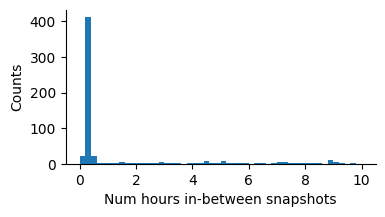

In [137]:
ax = (all_output_df['page_snapshot_times']
 .apply(lambda x: sorted(x))
 .apply(lambda x: list(map(lambda y: y[1] - y[0], zip(x[:-1], x[1:]))))
 .apply(np.mean)
 .apply(lambda x: x.total_seconds())
 .apply(lambda x: x/(60 * 60))
 .hist(bins=50, range=(0,10), figsize=(4, 2))
)
ax.set_ylabel('Counts')
ax.set_xlabel('Num hours in-between snapshots')
ax.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [138]:
site = 'https://washingtonpost.com'

In [140]:
p = Popen([
            "waybackpack", site,
            "--from-date",
            '20221202',
            "--to-date",
            '20221203',
            "--list"
    ], stdin=PIPE, stdout=PIPE, stderr=PIPE)
output, err = p.communicate()

In [143]:
num_links = output.decode().split()

In [152]:
wp_urls = list(map(lambda x: x.split('/')[4], num_links))

In [153]:
import glob

In [155]:
retrieved_files = glob.glob('../test-scraping-methods/use-wget/web.archive.org/web/*')

In [160]:
retrieved_files = list(filter(lambda x: not x.endswith('_'), retrieved_files))

In [163]:
retrieved_files = list(map(lambda x: x.split('/')[-1], retrieved_files))

In [166]:
len(set(wp_urls) - set(retrieved_files))

246

In [168]:
len(set(wp_urls))

322

# Parse the homepages

In [169]:
ls ../scripts/

artifact_cache.csv               get_bounding_boxes_from_html.py
download_data_git_archives.py    js/


In [795]:
import seaborn as sns
import json 
from playwright.async_api import async_playwright
import sys
sys.path.insert(0, '../scripts/')
import get_bounding_boxes_from_html as bb
from importlib import reload 
import os
here = os.getcwd()
import glob
from datetime import datetime
reload(bb)
import matplotlib.pyplot as plt 
from matplotlib.patches import Rectangle
from tqdm.auto import tqdm

In [783]:
playwright = await async_playwright().start()
browser = await playwright.chromium.launch(headless = False)

In [784]:
page = await browser.new_page()

In [785]:
nyt_files = glob.glob(
    '../test-scraping-methods/use-wget/web-archive-5-days/web.archive.org/web/*[!_]/https:/nytimes.com'
)

In [786]:
nyt_files = sorted(nyt_files, key=lambda x: x.split('/')[-3])

In [787]:
nyt_timestamps = list(map(lambda x: x.split('/')[-3], nyt_files))
nyt_timestamps = list(map(lambda x: datetime.strptime(x, '%Y%m%d%H%M%S'),  nyt_timestamps))

In [273]:
time_diffs = (pd.Series(list(map(lambda x: x[1] - x[0], zip(nyt_timestamps[:-1], nyt_timestamps[1:]))))
#  .apply(lambda x: x.total_seconds() / (60 * 60))
)

In [788]:
for f in nyt_files:
    if not os.path.isdir(f) and (not os.path.basename(f) == 'index.html'):
        dir_path = os.path.dirname(f)
        new_path = os.path.join(dir_path, 'index.html')
        os.rename(f, new_path)
        os.makedirs(f)
        os.rename(new_path, os.path.join(f, 'index.html'))

In [789]:
nyt_files = glob.glob(
    '../test-scraping-methods/use-wget/web-archive-5-days/web.archive.org/web/*[!_]/https:/nytimes.com/*'
)

In [791]:
all_height_width = []
all_bounding_box_dfs = []

In [792]:
retrieved_keys = list(map(lambda x: x['key'], all_height_width))

In [793]:
await page.route(
    "**/*", 
    lambda route: route.abort() 
        if route.request.resource_type == "image" 
        else route.continue_() 
) 

await page.route(
    "https://web.archive.org*/*", 
    lambda route: route.abort() 
) 

In [794]:
for nyt_file in tqdm(sorted(nyt_files, key=lambda x: x.split('/')[-4])):
    fp = os.path.join(here, nyt_file)
    datestr = fp.split('/')[-4]
    file = f'file://{fp}'
    
    if datestr in retrieved_keys:
        continue
    
    await page.goto(file, timeout=0)
    # instantiate the model and the weights
    
    model_weights = await bb.load_model_files_and_helper_scripts(page)
    await page.evaluate(bb.instantiate_model_js % model_weights)
    await page.evaluate(bb.get_link_divs_js)
    b = await bb.get_bounding_box_info(page)
    
    all_height_width.append({
        'height': b['height'],
        'width': b['width'],
        'key': datestr
    })
    bounding_box_df = pd.DataFrame(b['bounding_boxes'])
    bounding_box_df['width'] = b['width']
    bounding_box_df['height'] = b['height']
    bounding_box_df['datestr'] = datestr
    all_bounding_box_dfs.append(bounding_box_df)

  0%|          | 0/776 [00:00<?, ?it/s]

Error: ReferenceError: psl is not defined
    at is_banned_host (eval at evaluate (:197:30), <anonymous>:65:18)
    at LRUrlPredictor.get_prediction (eval at evaluate (:197:30), <anonymous>:120:13)
    at eval (eval at evaluate (:197:30), <anonymous>:8:50)
    at Array.filter (<anonymous>)
    at eval (eval at evaluate (:197:30), <anonymous>:8:14)
    at eval (<anonymous>)
    at UtilityScript.evaluate (<anonymous>:197:30)
    at UtilityScript.<anonymous> (<anonymous>:1:44)

In [466]:
from scipy.stats import entropy 

In [705]:
entropies = list(map(lambda df: df['width'].round().value_counts().pipe(entropy), all_bounding_box_dfs))

In [776]:
all_bounding_box_dfs[0]

,href,link_text,is_article,x,y,width,height,all_text,datestr
0,file:///Users/alex/Projects/usc-research/newsw...,Continue reading the main story,True,0.000000,8.000000,1280.000000,281.0,Continue reading the main story,20221101135642
1,file:///Users/alex/Projects/usc-research/newsw...,Skip to content,True,156.906250,292.000000,25.000000,20.0,Skip to content,20221101135642
2,file:///Users/alex/Projects/usc-research/newsw...,Skip to site index,True,156.906250,292.000000,25.000000,20.0,Skip to site index,20221101135642
3,file:///Users/alex/Projects/usc-research/newsw...,,True,0.000000,0.000000,0.000000,0.0,,20221101135642
4,file:///Users/alex/Projects/usc-research/newsw...,U.S.,True,60.906250,295.000000,1158.187500,27.0,U.S. International Canada Español 中文,20221101135642
...,...,...,...,...,...,...,...,...,...
97,file:///Users/alex/Projects/usc-research/newsw...,Continue reading the main story,True,45.906250,8759.171875,1188.187500,322.0,Advertisement Continue reading the main story,20221101135642
98,https://web.archive.org/web/20221101135642/htt...,© 2022 The New York Times Company,True,545.125000,9091.171875,189.750000,13.0,© 2022 The New York Times Company,20221101135642
99,https://web.archive.org/web/20221101135642/htt...,Accessibility,True,259.046875,9119.171875,79.906250,20.0,Accessibility,20221101135642
100,https://web.archive.org/web/20221101135642/htt...,Terms of Service,True,770.171875,9119.171875,101.921875,20.0,Terms of Service,20221101135642


In [661]:
t = list(filter(lambda df: ~df['href'].str.startswith('https://web.archive.org').any(), full_page_layout_dfs))

In [662]:
len(t)

86

In [707]:
full_page_layout_dfs = list(filter(
    lambda df: df['width'].round().value_counts().pipe(entropy) > 2, all_bounding_box_dfs
))

full_page_layout_dfs = list(filter(
    lambda df: df['href'].str.startswith('https://web.archive.org').any(), full_page_layout_dfs))

full_page_layout_dfs = list(map(lambda df: 
    df.loc[lambda df: df['href'].str.startswith('https://web.archive.org')]
      .assign(site_urls=lambda df: df['href'].str.split('/\d{14}/').str.get(1))
, full_page_layout_dfs))

full_page_layout_dfs = sorted(full_page_layout_dfs, key=lambda x: x.iloc[0]['datestr'])

In [708]:
wayback_links = pd.concat(full_page_layout_dfs)

In [709]:
wayback_links['site_urls'].value_counts()

https://www.nytimes.com/live/2022/11/02/us/elections-midterms                                                     427
https://www.nytimes.com/interactive/2021/us/covid-cases-deaths-tracker.html                                       418
https://help.nytimes.com/hc/en-us/articles/115014792127-Copyright-notice                                          418
https://help.nytimes.com/hc/en-us/articles/115014893968-Terms-of-sale                                             418
https://help.nytimes.com/hc/en-us/articles/115015727108-Accessibility                                             418
                                                                                                                 ... 
https://www.nytimes.com/live/2022/11/01/us/elections-midterms#a-worrisome-pattern-is-re-emerging-for-pollsters      1
https://www.nytimes.com/live/2022/11/02/us/elections-midterms#ny-lee-zeldin-profile-governor                        1
https://www.nytimes.com/live/2022/11/03/us/elections-mid

In [710]:
t = 'https://www.nytimes.com/2022/11/01/well/better-sleep-tips.html'

In [770]:
page_width_height_df = pd.DataFrame(all_height_width)

In [772]:
(wayback_links
 .merge(page_width_height_df, right_on='key', left_on='datestr')
)

,href,link_text,is_article,x,y,width_x,height_x,all_text,datestr,site_urls,height_y,width_y,key
0,https://web.archive.org/web/20221101000458/htt...,"U.S. Midterm Elections Oct. 31, 2022, 7:49 p....",True,495.203125,448.000000,184.875000,16.296875,"U.S. Midterm Elections Oct. 31, 2022, 7:49 p....",20221101000458,https://www.nytimes.com/live/2022/10/31/us/ele...,10075,1280,20221101000458
1,https://web.archive.org/web/20221101000458/htt...,"U.S. Midterm Elections Oct. 31, 2022, 7:49 p....",True,495.203125,448.000000,184.875000,16.296875,"U.S. Midterm Elections Oct. 31, 2022, 7:49 p....",20221101000458,https://www.nytimes.com/live/2022/10/31/us/ele...,10075,1280,20221101000458
2,https://web.archive.org/web/20221101000458/htt...,"Brazil Election Oct. 31, 2022, 7:30 p.m. ET",True,700.078125,448.000000,133.578125,16.296875,"Brazil Election Oct. 31, 2022, 7:30 p.m. ET",20221101000458,https://www.nytimes.com/live/2022/10/31/world/...,10075,1280,20221101000458
3,https://web.archive.org/web/20221101000458/htt...,"Brazil Election Oct. 31, 2022, 7:30 p.m. ET",True,700.078125,448.000000,133.578125,16.296875,"Brazil Election Oct. 31, 2022, 7:30 p.m. ET",20221101000458,https://www.nytimes.com/live/2022/10/31/world/...,10075,1280,20221101000458
4,https://web.archive.org/web/20221101000458/htt...,Man Planned to Kidnap Nancy Pelosi and Break ...,True,45.906250,501.296875,288.281250,281.687500,Man Planned to Kidnap Nancy Pelosi and Break ...,20221101000458,https://www.nytimes.com/2022/10/31/us/pelosi-h...,10075,1280,20221101000458
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36126,https://web.archive.org/web/20221104002021/htt...,The Best First Wordle Words What the data tel...,True,45.906250,8214.687500,1188.187500,270.437500,Play Spelling Bee How many words can you make...,20221104002021,https://www.nytimes.com/2022/09/01/crosswords/...,8917,1280,20221104002021
36127,https://web.archive.org/web/20221104002021/htt...,© 2022 The New York Times Company,True,545.125000,8817.125000,189.750000,13.000000,© 2022 The New York Times Company,20221104002021,https://help.nytimes.com/hc/en-us/articles/115...,8917,1280,20221104002021
36128,https://web.archive.org/web/20221104002021/htt...,Accessibility,True,259.046875,8845.125000,79.906250,20.000000,Accessibility,20221104002021,https://help.nytimes.com/hc/en-us/articles/115...,8917,1280,20221104002021
36129,https://web.archive.org/web/20221104002021/htt...,Terms of Service,True,770.171875,8845.125000,101.921875,20.000000,Terms of Service,20221104002021,https://help.nytimes.com/hc/en-us/articles/115...,8917,1280,20221104002021


In [744]:
t2 = (wayback_links
 .loc[lambda df: df['site_urls'] == t]
  [['x', 'y']]
 .pipe(lambda df: pd.DataFrame(list(zip(df.iloc[:-1].itertuples(), df.iloc[1:].itertuples()))))
 .pipe(lambda df: pd.concat([
     df.apply(lambda x: x[1].x - x[0].x, axis=1).to_frame('x'),
     df.apply(lambda x: x[1].y - x[0].y, axis=1).to_frame('y'),
 ], axis=1))
)

(-641.33671875, 30.539843750000003)

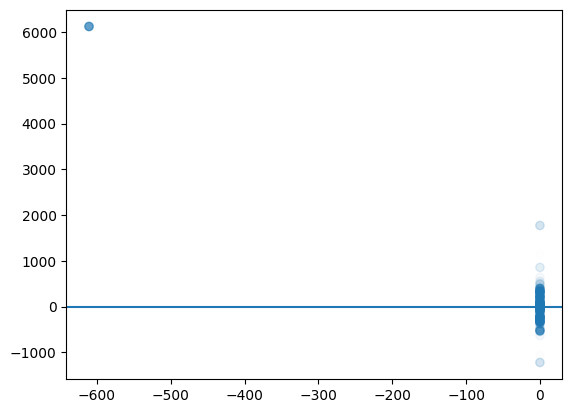

In [762]:
plt.scatter(t2['x'], t2['y'], alpha=1 - ((t2.index+ 1)/ 206))
xmin, xmax = plt.xlim()
plt.hlines(0, xmin, xmax)
plt.xlim(xmin, xmax)

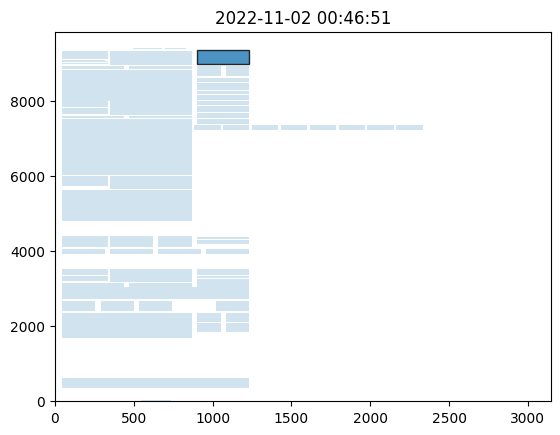

In [693]:
link_dfs = list(filter(lambda df: (df['site_urls'] == t).any(), full_page_layout_dfs))
bb_df = link_dfs[14]

xmax = bb_df['x'].max()
ymax = bb_df['y'].max()

fig, ax = plt.subplots()
ax.set_ylim((0, ymax))
ax.set_xlim((0, xmax))

for i, b in bb_df.iterrows():
    alpha=.2
    edgecolor=None
    if (b['site_urls'] == t):
        alpha=.8
        edgecolor='black'
    ax.add_patch(
        Rectangle(
            xy=(b['x'], ymax - b['y'] - b['height']), 
            width=b['width'], 
            height=b['height'],
            alpha=alpha,
            edgecolor=edgecolor
        )
    )
plt.title(datetime.strptime(bb_df['datestr'].iloc[0], '%Y%m%d%H%M%S'))
plt.show()

# Checks

In [357]:
await bb.add_visual_bounding_boxes(page)

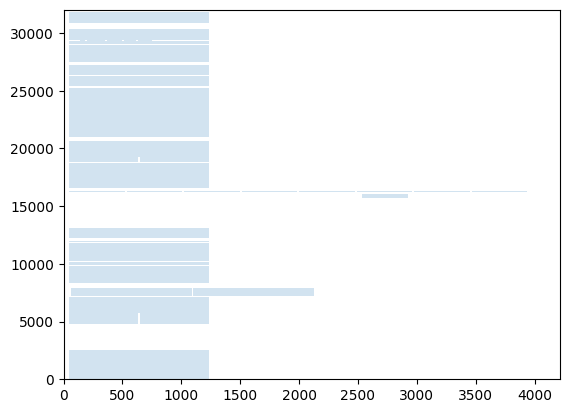

In [533]:
bb_df = all_bounding_box_dfs[12]

xmax = bb_df['x'].max()
ymax = bb_df['y'].max()

fig, ax = plt.subplots()
ax.set_ylim((0, ymax))
ax.set_xlim((0, xmax))

for i, b in bb_df.iterrows():
    ax.add_patch(Rectangle((b['x'], ymax - b['y'] - b['height']), b['width'], b['height'], alpha=.2))
plt.show()